## Linear Regression on Soccer League dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure

In [2]:
soccer_data_url="https://s3.amazonaws.com/projex.dezyre.com/fundamentals-simple-linear-regression-python-beginners/materials/EPL_Soccer_MLR_LR.csv"
df = pd.read_csv(soccer_data_url)

In [3]:
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


### **Data Dictionary**

* PlayerName : Player Name

* Club : Club of the player
  1. MUN:Manchester United F.C.
  2. CHE: Chelsea F.C.
  3. LIV: Liverpool F.C.

* DistanceCovered(InKms): Average Kms distance covered by the player in each game

* Goals: Average Goals per match

* MinutestoGoalRatio: Minutes 

* ShotsPerGame: Average shots taken per game

* AgentCharges: Agent Fees 

* BMI: Body-Mass index

* Cost: Cost of each player in hundread thousand dollars

* PreviousClubCost: Previous club cost in hundread thousand dollars

* Height: Height of player in cm

* Weight: Weight of player in kg

* Score: Average score per match

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [5]:
numeric = df.iloc[:, 2:]
numeric.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


Text(0.5, 1.0, 'Correlation Between Variables')

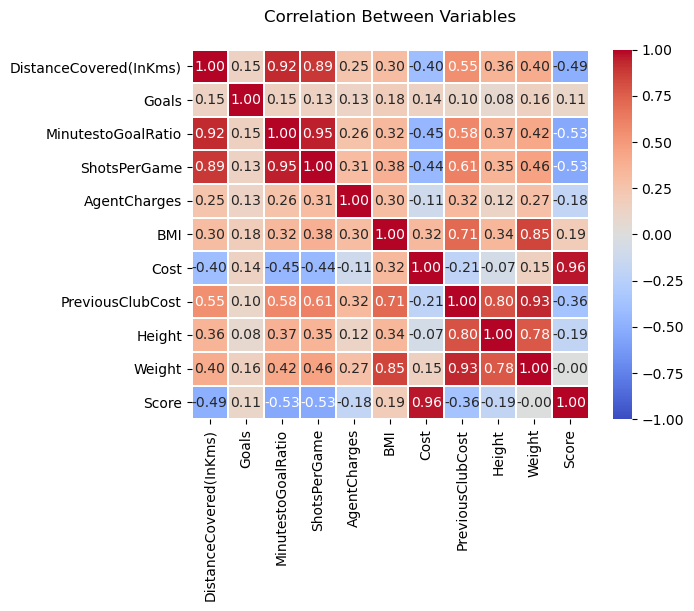

In [6]:
sns.heatmap(numeric.corr(), vmin=-1, vmax=1, cmap = 'coolwarm', annot=True, fmt='.2f', linewidths=0.1)
plt.title("Correlation Between Variables", pad=20)

### 
cost and score have a high positive correlation, indicating a linear relationship.

### Correlation between Cost and Score 

Text(0.5, 1.0, 'Scatter plot between Cost and Score')

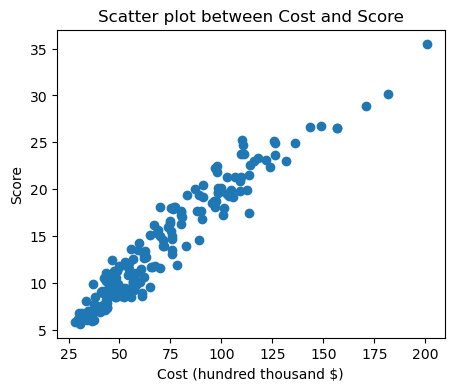

In [7]:
figure(figsize=(5,4))
plt.scatter(df['Cost'], df['Score'])

plt.xlabel("Cost (hundred thousand $)")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")

### Linear Regression model

In [8]:
X = df[['Cost']]
y = df[['Score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,
                                                    test_size = 0.2, random_state = 100)

reg = LinearRegression().fit(X_train, y_train)

In [9]:
reg.coef_

array([[0.18368074]])

### Prediction on test set

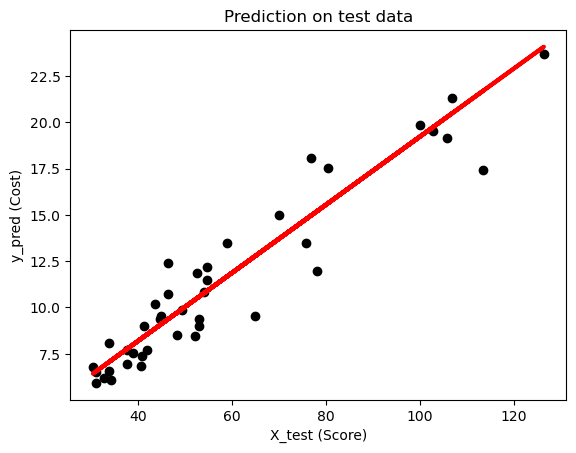

In [10]:
y_pred = reg.predict(X_test)

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.title("Prediction on test data")
plt.xlabel('X_test (Score)')
plt.ylabel('y_pred (Cost)')
plt.show()

### Mean Squred Error between y_test and y_pred

In [11]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 2.35
